# Dependencies and Libraries

In [ ]:
!pip install camelot-py[cv]
!pip install pandas openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 2.6 MB/s eta 0:00:00


In [ ]:
!apt-get install -y ghostscript


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 10 newly installed, 0 to remove and 18 not upgraded.
Need to get 16.7 MB of archives.
After this operation, 63.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-droid-fallback all 1:6.0.1r16-1.1build1 [1,805 kB]
Ge

Check Dependencies

In [ ]:
import camelot

print("Camelot version:", camelot.__version__)
!gs --version


/usr/local/lib/python3.11/dist-packages/pypdf/_crypt_providers/_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from this module in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


Camelot version: 1.0.0
9.55.0


In [ ]:
!pip install ipywidgets
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00


In [ ]:
import camelot
import pandas as pd


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---


#Extract Bank Statement Data
**PLEASE ADJUST TABLE AREA AND COLUMNS WITH EVERY BANK STATEMENT FILES**



```
# Parameter
BCA FONT BESAR

#Define the area(s) to extract tables from
table_areas = ["30,610,580,90/60"]  # Modify or add more areas as needed

For DEDISEP
table_areas = ["30,610,580,60"]

# Define the column area
columns = ["80,190,300,350,450,490"]


BCA FONT KECIL
table_areas=['30,600,580,85']
```



Processing table 1...


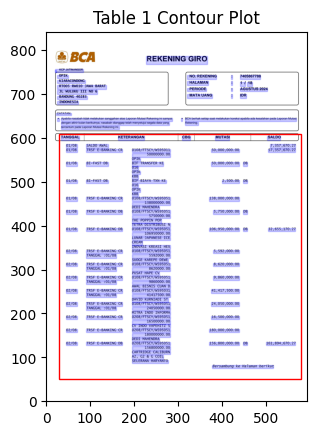

Processing table 2...


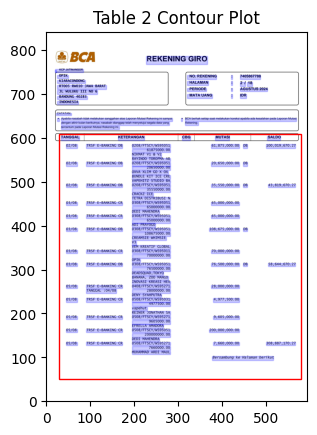

Processing table 3...


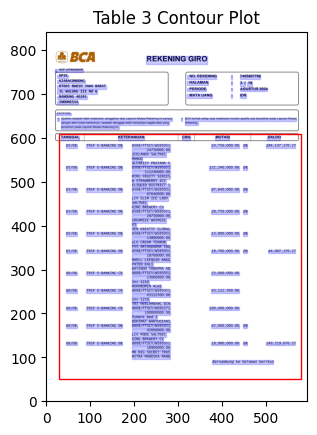

Processing table 4...


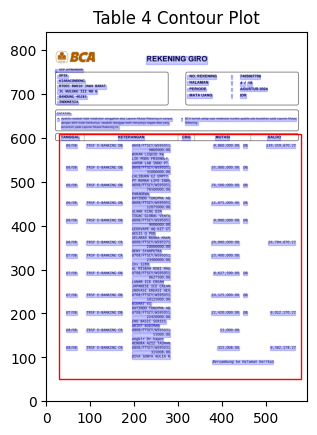

Processing table 5...


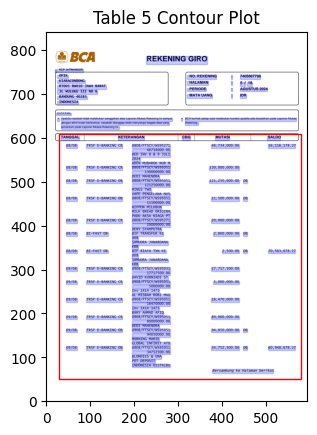

Processing table 6...


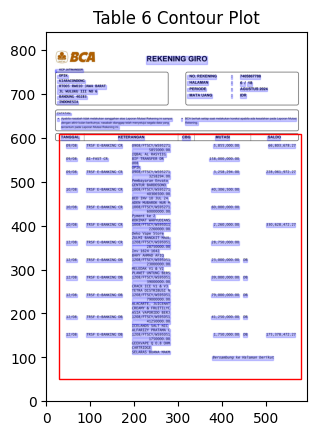

Processing table 7...


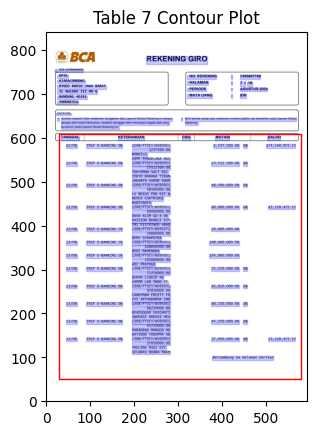

Processing table 8...


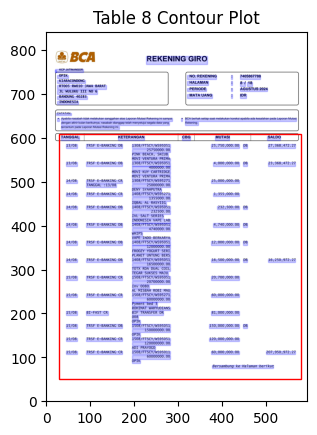

Processing table 9...


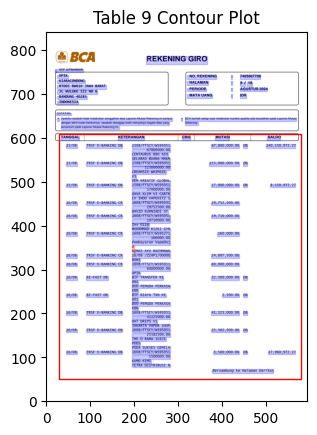

Processing table 10...


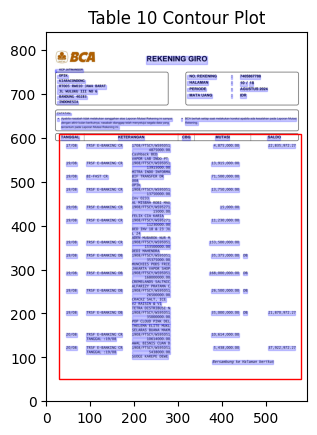

Processing table 11...


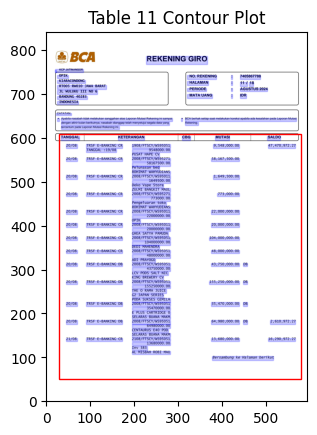

Processing table 12...


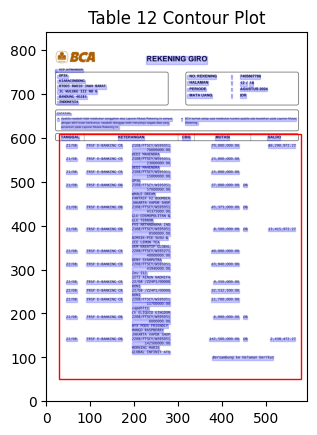

Processing table 13...


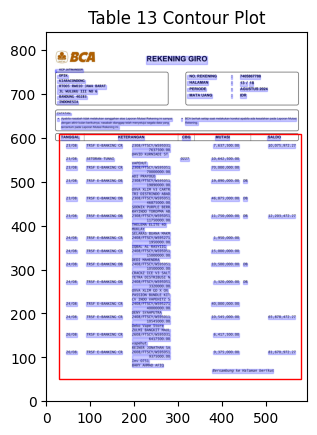

Processing table 14...


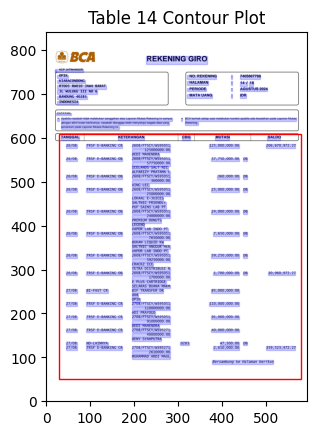

Processing table 15...


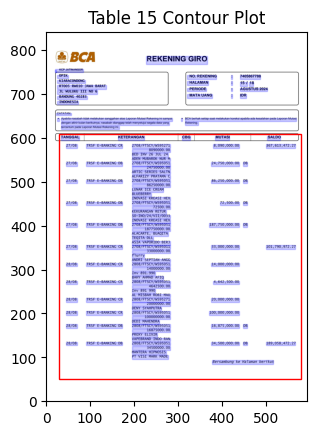

Processing table 16...


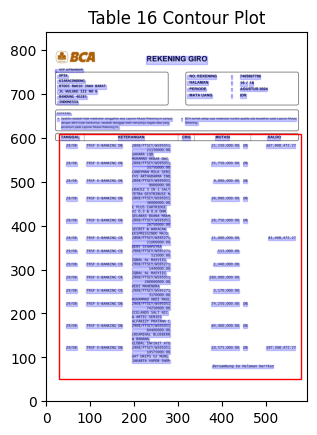

Processing table 17...


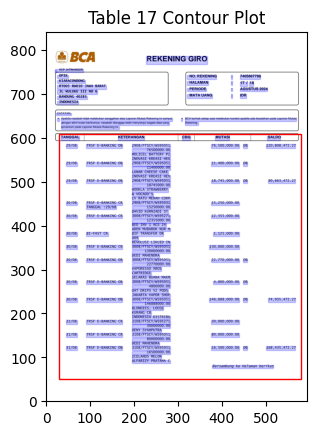

Processing table 18...


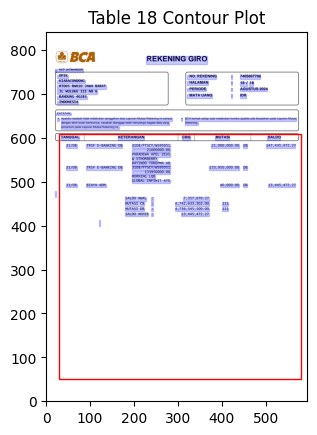

Merged Table:


,TANGGAL,,KETERANGAN,CBG,MUTASI,,SALDO
0,01/08,SALDO AWAL,,,,,"7,357,670.27"
1,01/08,TRSF E-BANKING CR,0108/FTSCY/WS95011,,"50,000,000.00",,"57,357,670.27"
2,,,50000000.00,,,,
3,,,OPIK,,,,
4,01/08,BI-FAST DB,BIF TRANSFER KE,,"50,000,000.00",DB,
...,...,...,...,...,...,...,...
863,31/08,BIAYA ADM,,,"40,000.00",DB,"13,445,472.27"
864,,,SALDO AWAL\n:,"7,357,670.27",,,
865,,,MUTASI CR\n:,"4,742,633,302.00",111,,
866,,,MUTASI DB\n:,"4,736,545,500.00",111,,


In [ ]:
import camelot
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Path to the PDF file
pdf_path = r"/content/drive/MyDrive/Akuntansi/Agustus/opik788agu.pdf"

# Define the area(s) to extract tables from
table_areas = ["30,610,580,50"]  # Modify or add more areas as needed

# Define the column area
columns = ["80,190,300,350,450,490"]

# Specify pages to process ("all" for all pages, or "1,2,3" for specific pages)
pages_to_process = "all"

# Extract tables from the specified pages and areas
tables = camelot.read_pdf(pdf_path, flavor="stream", table_areas=table_areas, columns=columns, pages=pages_to_process)

# Check if any tables were found
if tables.n == 0:
    print("No tables were found in the specified PDF and areas.")
else:
    # List to store individual DataFrames
    dataframes = []

    # Process each extracted table
    for i, table in enumerate(tables):
        print(f"Processing table {i + 1}...")

        # Get the table DataFrame
        df = table.df

        # If the table is from the second page onward, drop the first row
        if i > 0:
            df = df.iloc[1:]  # Drop the first row

        # Append the adjusted DataFrame to the list
        dataframes.append(df)

        # Optional: Save each table as a separate CSV for debugging
        # df.to_csv(f"table_page_{i + 1}.csv", index=False)
        # print(f"Table {i + 1} saved as 'table_page_{i + 1}.csv'.")

        # Plot the contour for the table
        camelot.plot(table, kind="contour")
        plt.title(f"Table {i + 1} Contour Plot")
        plt.show()

    # Merge all DataFrames into a single DataFrame
    merged_table = pd.concat(dataframes, ignore_index=True)

    # Use the first row of the merged table as the header
    merged_table.columns = merged_table.iloc[0]  # Set the first row as the header
    merged_table = merged_table[1:]  # Drop the first row as it's now the header
    merged_table.reset_index(drop=True, inplace=True)  # Reset the index

    # Display the merged table
    print("Merged Table:")
    display(merged_table)

    # Save the merged table to a single CSV file
    # merged_table.to_csv("merged_table.csv", index=False)
    # print("Merged table saved as 'merged_table.csv'.")


DF1 as ALSO THE MERGED TABLE

Dont Forget to RUN THIS CODE AND FIX THE COLUMN INDEXING

In [ ]:
df1 = pd.DataFrame(merged_table)

In [ ]:
# Inspect column names
print(df1.columns)


Index(['TANGGAL', '', 'KETERANGAN', 'CBG', 'MUTASI', '', 'SALDO'], dtype='object', name=0)


In [ ]:
# Check initial column names
print("Before renaming:", merged_table.columns)

# Rename the second and sixth columns
merged_table.columns.values[1] = "TRANSAKSI"  # Rename the second column
merged_table.columns.values[5] = "DEBIT"  # Rename the sixth column

# Confirm the changes
print("After renaming:", merged_table.columns)



Before renaming: Index(['TANGGAL', '', 'KETERANGAN', 'CBG', 'MUTASI', '', 'SALDO'], dtype='object', name=0)
After renaming: Index(['TANGGAL', 'TRANSAKSI', 'KETERANGAN', 'CBG', 'MUTASI', 'DEBIT',
       'SALDO'],
      dtype='object', name=0)


In [ ]:
# Check for duplicate column names
print("Column names before fixing:", merged_table.columns)
print("Duplicate column names:", merged_table.columns[merged_table.columns.duplicated()])


Column names before fixing: Index(['TANGGAL', 'TRANSAKSI', 'KETERANGAN', 'CBG', 'MUTASI', 'DEBIT',
       'SALDO'],
      dtype='object', name=0)
Duplicate column names: Index([], dtype='object', name=0)


In [ ]:
# Make column names unique by appending suffixes
merged_table.columns = pd.Series(merged_table.columns).apply(
    lambda x: f"{x}_{merged_table.columns.tolist().count(x)}" if merged_table.columns.tolist().count(x) > 1 else x
)

# Confirm unique column names
print("Column names after fixing:", merged_table.columns)


Column names after fixing: Index(['TANGGAL', 'TRANSAKSI', 'KETERANGAN', 'CBG', 'MUTASI', 'DEBIT',
       'SALDO'],
      dtype='object', name=0)


Merge Rows with TANGGAL rows

In [ ]:
# Define the condition for rows to be deleted (e.g., rows where KETERANGAN is empty)
condition = df1["DEBIT"] == "Bersambung ke Halaman berikut"  # Delete rows where KETERANGAN is empty

# Delete rows based on the condition
df1 = df1[~condition].reset_index(drop=True)  # Use ~ to negate the condition

from IPython.display import display
display(df1)

,TANGGAL,TRANSAKSI,KETERANGAN,CBG,MUTASI,DEBIT,SALDO
0,01/08,SALDO AWAL,,,,,"7,357,670.27"
1,01/08,TRSF E-BANKING CR,0108/FTSCY/WS95011,,"50,000,000.00",,"57,357,670.27"
2,,,50000000.00,,,,
3,,,OPIK,,,,
4,01/08,BI-FAST DB,BIF TRANSFER KE,,"50,000,000.00",DB,
...,...,...,...,...,...,...,...
846,31/08,BIAYA ADM,,,"40,000.00",DB,"13,445,472.27"
847,,,SALDO AWAL\n:,"7,357,670.27",,,
848,,,MUTASI CR\n:,"4,742,633,302.00",111,,
849,,,MUTASI DB\n:,"4,736,545,500.00",111,,


In [ ]:
def merge_rows(df1):
    merged_data = []
    temp_row = None  # Temporary storage for merging rows

    for _, row in df1.iterrows():
        # Check if TANGGAL is not empty or NaN
        if isinstance(row['TANGGAL'], str) and row['TANGGAL'].strip():
            # Save the current temp_row if it exists
            if temp_row is not None:
                merged_data.append(temp_row)
            temp_row = row.copy()
        else:
            # If TANGGAL is empty, merge KETERANGAN with the previous row
            if temp_row is not None:
                temp_row['KETERANGAN'] = f"{temp_row['KETERANGAN']} {row['KETERANGAN']}".strip()

    # Append the last temp_row
    if temp_row is not None:
        merged_data.append(temp_row)

    return pd.DataFrame(merged_data)

# Apply the function to clean the extracted table
cleaned_table = merge_rows(merged_table)

# Reset the index for readability
cleaned_table = cleaned_table.reset_index(drop=True)

# Display the DataFrame
print("Extracted Table:")
from IPython.display import display
display(cleaned_table)  # This will show a nicely formatted table in Colab


Extracted Table:


,TANGGAL,TRANSAKSI,KETERANGAN,CBG,MUTASI,DEBIT,SALDO
0,01/08,SALDO AWAL,,,,,"7,357,670.27"
1,01/08,TRSF E-BANKING CR,0108/FTSCY/WS95011 50000000.00 OPIK,,"50,000,000.00",,"57,357,670.27"
2,01/08,BI-FAST DB,BIF TRANSFER KE 016 OPIK KBB,,"50,000,000.00",DB,
3,01/08,BI-FAST DB,BIF BIAYA TXN KE 016 OPIK KBB,,"2,500.00",DB,
4,01/08,TRSF E-BANKING CR,0108/FTSCY/WS95051 138000000.00 DEDI MAHENDRA,,"138,000,000.00",,
...,...,...,...,...,...,...,...
218,31/08,TRSF E-BANKING CR,3108/FTSCY/WS95051 80000000.00 DEDI MAHENDRA,,"80,000,000.00",,
219,31/08,TRSF E-BANKING DB,3108/FTSCY/WS95051 16500000.00 ICELANDS MELON ...,,"16,500,000.00",DB,"168,435,472.27"
220,31/08,TRSF E-BANKING DB,3108/FTSCY/WS95051 21000000.00 PARADEWA APEL Z...,,"21,000,000.00",DB,"147,435,472.27"
221,31/08,TRSF E-BANKING DB,3108/FTSCY/WS95051 133950000.00 MORNING LQD GL...,,"133,950,000.00",DB,


Keterangan cleaning to only obtain ACCOUNT HOLDER NAME

In [ ]:
# Convert to DataFrame
df2 = pd.DataFrame(cleaned_table)

# Define a function to filter uppercase words
def filter_uppercase(keterangan):
    words = keterangan.split()
    # Define the words to exclude
    exclude_words = {"BIF", "TRANSFER", "DR"}
    # Select only words that are all uppercase and have no digits
    filtered = [
        word for word in words
        if word.isupper() and not any(char.isdigit() for char in word) and word not in exclude_words
    ]
    return " ".join(filtered)

# Apply the function to the KETERANGAN column
df2['KETERANGAN'] = df2['KETERANGAN'].apply(filter_uppercase)

# Display the updated DataFrame
from IPython.display import display
display(df2)

,TANGGAL,TRANSAKSI,KETERANGAN,CBG,MUTASI,DEBIT,SALDO
0,01/08,SALDO AWAL,,,,,"7,357,670.27"
1,01/08,TRSF E-BANKING CR,OPIK,,"50,000,000.00",,"57,357,670.27"
2,01/08,BI-FAST DB,KE OPIK KBB,,"50,000,000.00",DB,
3,01/08,BI-FAST DB,BIAYA TXN KE OPIK KBB,,"2,500.00",DB,
4,01/08,TRSF E-BANKING CR,DEDI MAHENDRA,,"138,000,000.00",,
...,...,...,...,...,...,...,...
218,31/08,TRSF E-BANKING CR,DEDI MAHENDRA,,"80,000,000.00",,
219,31/08,TRSF E-BANKING DB,ICELANDS MELON ALFARIZY PRATAMA C,,"16,500,000.00",DB,"168,435,472.27"
220,31/08,TRSF E-BANKING DB,PARADEWA APEL ZEUS STHORBERRY RAYINDO TOROPMA AB,,"21,000,000.00",DB,"147,435,472.27"
221,31/08,TRSF E-BANKING DB,MORNING LQD GLOBAL INFINIT ATO,,"133,950,000.00",DB,


If Want to Obtain The Cleaned Table
**ONLY IF NECESARRY**

In [ ]:
# Export to Excel
excel_path = "/content/drive/MyDrive/Akuntansi/cleaned_opik223sep.xlsx"  # Specify the output file path
df2.to_excel(excel_path, index=False, engine="openpyxl")
print(f"Merged table exported to '{excel_path}'.")

Merged table exported to '/content/drive/MyDrive/Akuntansi/cleaned_opik223sep.xlsx'.




---
# Accounting Program
To multiple every transaction and debit credit decision


In [ ]:
# Drop the TRANSAKSI and SALDO columns
df2_cleaned = df2.drop(columns=["TRANSAKSI", "SALDO"])

# Display the duplicated DataFrame
from IPython.display import display
display(df2_cleaned)

,TANGGAL,KETERANGAN,CBG,MUTASI,DEBIT
0,01/08,,,,
1,01/08,OPIK,,"50,000,000.00",
2,01/08,KE OPIK KBB,,"50,000,000.00",DB
3,01/08,BIAYA TXN KE OPIK KBB,,"2,500.00",DB
4,01/08,DEDI MAHENDRA,,"138,000,000.00",
...,...,...,...,...,...
218,31/08,DEDI MAHENDRA,,"80,000,000.00",
219,31/08,ICELANDS MELON ALFARIZY PRATAMA C,,"16,500,000.00",DB
220,31/08,PARADEWA APEL ZEUS STHORBERRY RAYINDO TOROPMA AB,,"21,000,000.00",DB
221,31/08,MORNING LQD GLOBAL INFINIT ATO,,"133,950,000.00",DB


In [ ]:
# Rename CBG to NAMA_AKUN
df2_cleaned.rename(columns={"CBG": "NAMA_AKUN"}, inplace=True)

# Add new columns
df2_cleaned.insert(df2_cleaned.columns.get_loc("NAMA_AKUN") + 1, "AKUN", "")  # Add AKUN column after NAMA_AKUN
df2_cleaned.rename(columns={"MUTASI": "DEBET"}, inplace=True)  # Rename MUTASI to DEBET
df2_cleaned.insert(df2_cleaned.columns.get_loc("DEBET") + 1, "KREDIT", "")  # Add KREDIT column after DEBET

# Display the rearranged DataFrame
from IPython.display import display
display(df2_cleaned)

,TANGGAL,KETERANGAN,NAMA_AKUN,AKUN,DEBET,KREDIT,DEBIT
0,01/08,,,,,,
1,01/08,OPIK,,,"50,000,000.00",,
2,01/08,KE OPIK KBB,,,"50,000,000.00",,DB
3,01/08,BIAYA TXN KE OPIK KBB,,,"2,500.00",,DB
4,01/08,DEDI MAHENDRA,,,"138,000,000.00",,
...,...,...,...,...,...,...,...
218,31/08,DEDI MAHENDRA,,,"80,000,000.00",,
219,31/08,ICELANDS MELON ALFARIZY PRATAMA C,,,"16,500,000.00",,DB
220,31/08,PARADEWA APEL ZEUS STHORBERRY RAYINDO TOROPMA AB,,,"21,000,000.00",,DB
221,31/08,MORNING LQD GLOBAL INFINIT ATO,,,"133,950,000.00",,DB


In [ ]:
# Duplicate each row
df2_duplicated = df2_cleaned.loc[df2_cleaned.index.repeat(2)].reset_index(drop=True)

# Apply logic to modify DEBET and KREDIT columns
for i in range(0, len(df2_duplicated), 2):
    # First (real) transaction
    if df2_duplicated.loc[i, "DEBIT"] == "DB":
        # Keep DEBET in the first row, move it to KREDIT in the second row
        df2_duplicated.loc[i + 1, "KREDIT"] = df2_duplicated.loc[i, "DEBET"]
        df2_duplicated.loc[i + 1, "DEBET"] = ""
    else:
        # Move DEBET to KREDIT in the first row, leave it in DEBET in the second row
        df2_duplicated.loc[i, "KREDIT"] = df2_duplicated.loc[i, "DEBET"]
        df2_duplicated.loc[i, "DEBET"] = ""
        df2_duplicated.loc[i + 1, "DEBET"] = df2_duplicated.loc[i, "KREDIT"]
        df2_duplicated.loc[i + 1, "KREDIT"] = ""

# Display the duplicated DataFrame
from IPython.display import display
display(df2_duplicated)

,TANGGAL,KETERANGAN,NAMA_AKUN,AKUN,DEBET,KREDIT,DEBIT
0,01/08,,,,,,
1,01/08,,,,,,
2,01/08,OPIK,,,,"50,000,000.00",
3,01/08,OPIK,,,"50,000,000.00",,
4,01/08,KE OPIK KBB,,,"50,000,000.00",,DB
...,...,...,...,...,...,...,...
441,31/08,PARADEWA APEL ZEUS STHORBERRY RAYINDO TOROPMA AB,,,,"21,000,000.00",DB
442,31/08,MORNING LQD GLOBAL INFINIT ATO,,,"133,950,000.00",,DB
443,31/08,MORNING LQD GLOBAL INFINIT ATO,,,,"133,950,000.00",DB
444,31/08,SALDO AWAL MUTASI CR MUTASI DB SALDO AKHIR,,,"40,000.00",,DB


In [ ]:
# Convert TANGGAL to DD/MM/YYYY with year 2024
df2_duplicated["TANGGAL"] = pd.to_datetime(df2_duplicated["TANGGAL"] + "/2024", format="%d/%m/%Y").dt.strftime("%d/%m/%Y")

# Display the duplicated DataFrame
from IPython.display import display
display(df2_duplicated)

,TANGGAL,KETERANGAN,NAMA_AKUN,AKUN,DEBET,KREDIT,DEBIT
0,01/08/2024,,,,,,
1,01/08/2024,,,,,,
2,01/08/2024,OPIK,,,,"50,000,000.00",
3,01/08/2024,OPIK,,,"50,000,000.00",,
4,01/08/2024,KE OPIK KBB,,,"50,000,000.00",,DB
...,...,...,...,...,...,...,...
441,31/08/2024,PARADEWA APEL ZEUS STHORBERRY RAYINDO TOROPMA AB,,,,"21,000,000.00",DB
442,31/08/2024,MORNING LQD GLOBAL INFINIT ATO,,,"133,950,000.00",,DB
443,31/08/2024,MORNING LQD GLOBAL INFINIT ATO,,,,"133,950,000.00",DB
444,31/08/2024,SALDO AWAL MUTASI CR MUTASI DB SALDO AKHIR,,,"40,000.00",,DB


In [ ]:
# Export to Excel
excel_path = "/content/drive/MyDrive/Akuntansi/Agustus/opik788agu.xlsx"  # Specify the output file path
df2_duplicated.to_excel(excel_path, index=False, engine="openpyxl")
print(f"Merged table exported to '{excel_path}'.")

Merged table exported to '/content/drive/MyDrive/Akuntansi/Agustus/opik788agu.xlsx'.
